Declare all imports

In [1]:
import math
import random
from collections import Counter

import numpy as np
from matplotlib import pyplot as plt

from src.dataobjs.cluster import Clusters
from src.dataobjs.mention_data import MentionData
from src.utils.io_utils import write_mention_to_json


Measure Clusters and Mentions by type 

In [3]:
dev_mentions = MentionData.read_mentions_json_to_mentions_data_list(
            '../resources/wec/dev/Event_gold_mentions.json')

test_mentions = MentionData.read_mentions_json_to_mentions_data_list(
            '../resources/wec/test/Event_gold_mentions.json')

train_mentions = MentionData.read_mentions_json_to_mentions_data_list(
            '../resources/wec/train/Event_gold_mentions.json')

all_mentions = test_mentions

found = False
final_mentions = list()
all_types = dict()
for mention in all_mentions:
    if mention.mention_type not in all_types:
        all_types[mention.mention_type] = dict()
    if mention.coref_chain not in all_types[mention.mention_type]:
        all_types[mention.mention_type][mention.coref_chain] = 0
    all_types[mention.mention_type][mention.coref_chain] += 1

for _type in all_types.keys():
    print(str(_type) + "-Clusters=" + str(len(all_types[_type])))
    print(str(_type) + "-Mentions=" + str(sum([clust for clust in all_types[_type].values()])))
print("Done-" + str(all_types))


Draw histograms of the data


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 17, 18, 18, 18, 20, 20, 23, 26, 33]


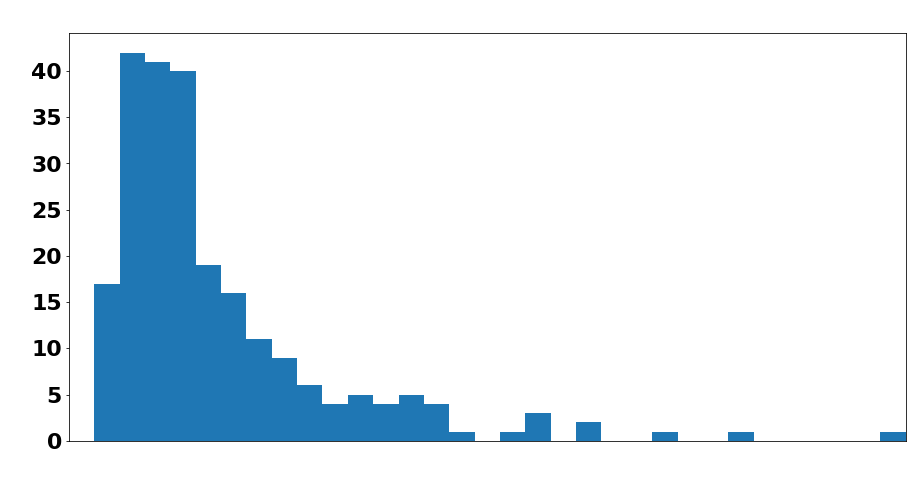

In [16]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

mentions = MentionData.read_mentions_json_to_mentions_data_list(
                       '../resources/wec/dev/Event_gold_mentions.json')
clusters = Clusters.from_mentions_to_gold_clusters(mentions)


data = [len(clust) for clust in clusters.values() if len(clust) <= 80] 
print(str(sorted(data)))
bins = np.arange(min(data), max(data) + 1, 1)

plt.rc('font', **font)
plt.rcParams.update({'text.color' : "white", 'axes.labelcolor' : "white"})
plt.rcParams.update({'xtick.color':'white'})

plt.xlim([0, max(data)])

plt.hist(data, bins=bins)
plt.title('TRAIN')
plt.xlabel('Cluster Size')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.show()
